In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
import pandas as pd

# Generate a synthetic 'u-shaped' dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
df_synthetic = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_synthetic['class'] = y

# Save the synthetic dataset to '/content/ushape.csv'
df_synthetic.to_csv('/content/ushape.csv', index=False)

print("Synthetic 'ushape.csv' generated and saved to /content/ushape.csv")
display(df_synthetic.head())

Synthetic 'ushape.csv' generated and saved to /content/ushape.csv


,feature_1,feature_2,class
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


In [3]:
df = pd.read_csv('/content/ushape.csv')
display(df.head())

,feature_1,feature_2,class
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


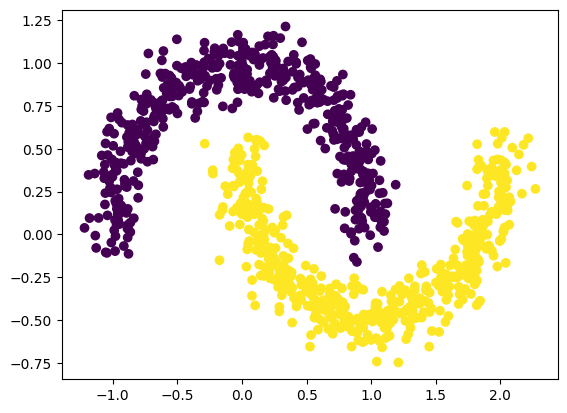

In [4]:
plt.scatter(df['feature_1'],df['feature_2'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

**Non-Zero Initialization with Sigmoid**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4855 - loss: 0.8708 - val_accuracy: 0.4950 - val_loss: 0.8451
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4802 - loss: 0.8588 - val_accuracy: 0.4950 - val_loss: 0.8286
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5046 - loss: 0.8150 - val_accuracy: 0.4950 - val_loss: 0.8133
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5221 - loss: 0.7817 - val_accuracy: 0.4950 - val_loss: 0.7994
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4863 - loss: 0.8038 - val_accuracy: 0.4950 - val_loss: 0.7866
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5226 - loss: 0.7590 - val_accuracy: 0.4950 - val_loss: 0.7755
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5049 - loss: 0.7673 - val_accuracy: 0.4950 - val_loss: 0.7647
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5054 - loss: 0.7561 - val_accuracy: 0.4950 - 

<Axes: >

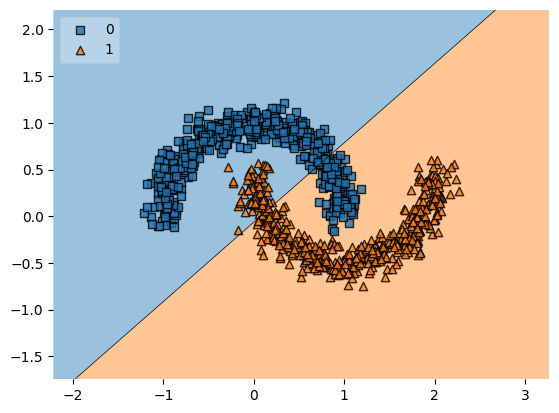

In [7]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.get_weights()
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X,y,epochs=100,validation_split=0.2)

model.get_weights()

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [8]:
model.get_weights()

[array([[ 1.6012237,  1.6012237],
        [-1.8855811, -1.8855811]], dtype=float32),
 array([-0.80753034, -0.80753034], dtype=float32),
 array([[1.1981534],
        [1.1981534]], dtype=float32),
 array([-0.80106586], dtype=float32)]

**Non-Zero Initialization with Tanh**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5177 - loss: 0.8178 - val_accuracy: 0.4950 - val_loss: 0.8170
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4959 - loss: 0.8136 - val_accuracy: 0.4950 - val_loss: 0.7970
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4939 - loss: 0.8052 - val_accuracy: 0.4950 - val_loss: 0.7800
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5082 - loss: 0.7702 - val_accuracy: 0.4950 - val_loss: 0.7643
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4836 - loss: 0.7714 - val_accuracy: 0.4950 - val_loss: 0.7504
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5252 - loss: 0.7310 - val_accuracy: 0.4950 - val_loss: 0.7383
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4987 - loss: 0.7337 - val_accuracy: 0.4950 - val_loss: 0.7268
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5173 - loss: 0.7136 - val_accuracy: 0.4950 - 

<Axes: >

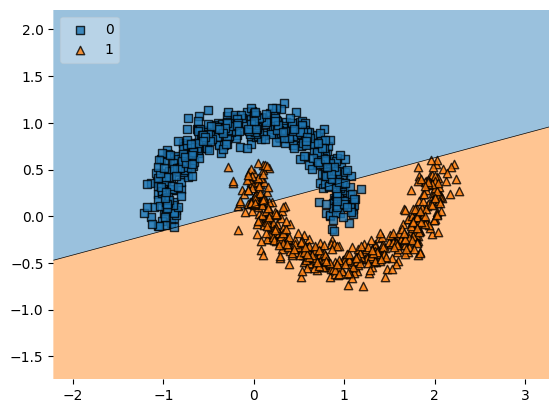

In [11]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.get_weights()
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X,y,epochs=100,validation_split=0.2)

model.get_weights()

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [12]:
model.get_weights()

[array([[ 0.3682967,  0.3682967],
        [-1.4156758, -1.4156758]], dtype=float32),
 array([0.11821155, 0.11821155], dtype=float32),
 array([[1.7736623],
        [1.7736623]], dtype=float32),
 array([0.11277211], dtype=float32)]

**Non-Zero Initialization with RELU**

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4727 - loss: 0.9217 - val_accuracy: 0.4950 - val_loss: 0.8706
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5249 - loss: 0.8278 - val_accuracy: 0.4950 - val_loss: 0.8439
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5058 - loss: 0.8226 - val_accuracy: 0.4950 - val_loss: 0.8195
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4785 - loss: 0.8312 - val_accuracy: 0.4950 - val_loss: 0.7985
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5064 - loss: 0.7746 - val_accuracy: 0.4950 - val_loss: 0.7813
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4864 - loss: 0.7828 - val_accuracy: 0.4950 - val_loss: 0.7657
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4860 - loss: 0.7707 - val_accuracy: 0.4950 - val_loss: 0.7519
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4857 - loss: 0.7479 - val_accuracy: 0.4950 - 

<Axes: >

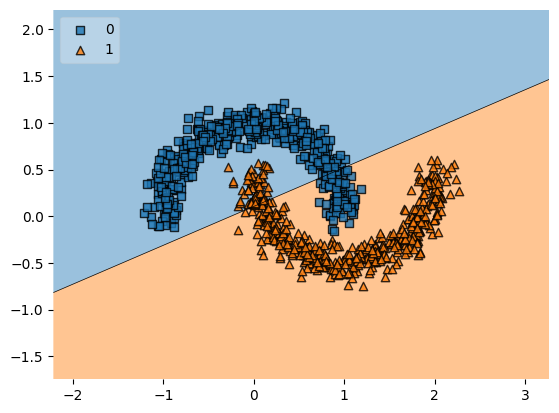

In [13]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.get_weights()
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X,y,epochs=100,validation_split=0.2)

model.get_weights()

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [14]:
model.get_weights()

[array([[ 0.52445656,  0.52445656],
        [-1.2608901 , -1.2608901 ]], dtype=float32),
 array([0.642835, 0.642835], dtype=float32),
 array([[1.0875206],
        [1.0875206]], dtype=float32),
 array([-1.1082014], dtype=float32)]